In [1]:
import pandas as pd 
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
df = pd.DataFrame(data = bc.data , columns = bc.feature_names)
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Splitting into the Training and Test sets 
from sklearn.model_selection import train_test_split
X = bc.data 
y = bc.target 
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
# Training the SVM model
from sklearn.svm import SVC 
clf = SVC(kernel="linear",random_state=0)
clf.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [5]:
# Test the Model
from sklearn.metrics import accuracy_score , confusion_matrix
y_pred = clf.predict(X_test)
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix : ",confusion_matrix(y_test,y_pred))

Accuracy Score :  0.956140350877193
Confusion Matrix :  [[39  4]
 [ 1 70]]


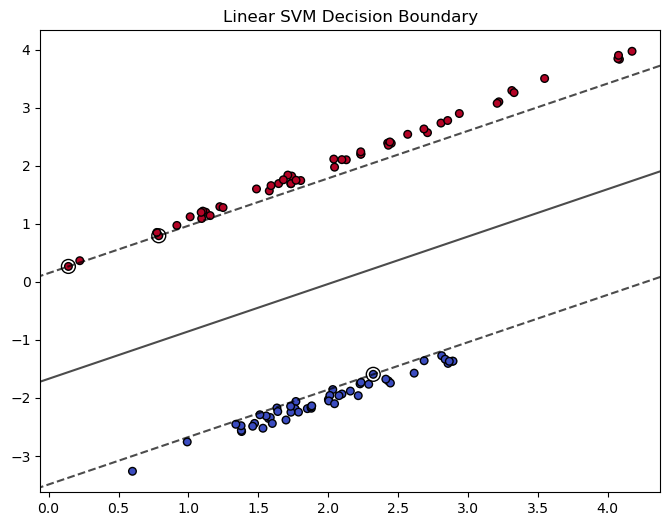

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC

# 1. Generate simple 2D data
X, y = datasets.make_classification(
    n_samples=100, n_features=2,
    n_informative=2, n_redundant=0,
    n_clusters_per_class=1, class_sep=2, random_state=42
)

# 2. Train Linear SVM
clf = SVC(kernel="linear", C=1.0)
clf.fit(X, y)

# 3. Plot decision boundary
plt.figure(figsize=(8,6))

# Plot points
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

# Create grid
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k',
           levels=[-1, 0, 1], alpha=0.7,
           linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
           s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.title("Linear SVM Decision Boundary")
plt.show()
